In [1]:
# Import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


In [2]:
movies = pd.read_csv("Training sheet.csv")

In [3]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [4]:
movies_df.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [6]:
# target = movies_df['Category']
# movies_df = movies_df.drop('Category', axis = 1)
movies_df.keys()

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [38]:
X = movies_df[['creative_type', 'source', 'production_method', 'genre', 'language',
               'board_rating_reason', 'movie_board_rating_display_name']]
y = movies_df["Category"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1196, 7) (1196, 1)


In [53]:
X.head()

,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name
0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13
1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13
2,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13
3,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G
4,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13


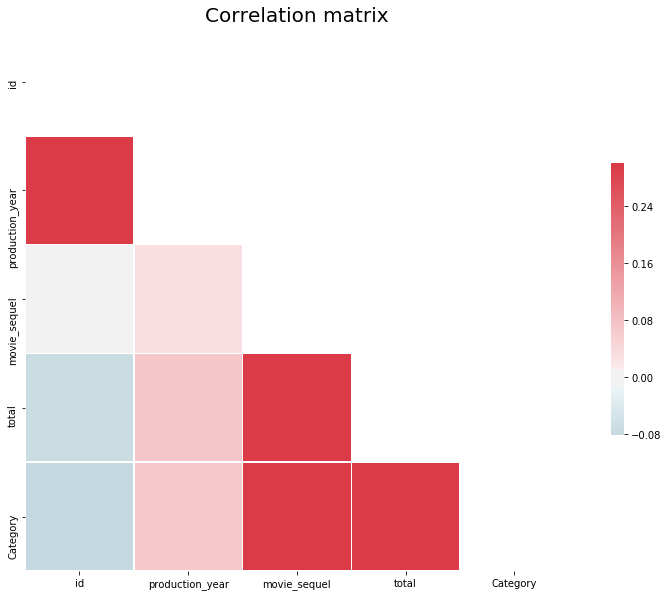

In [12]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = movies_df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

In [46]:
# remove spaces from the 'creative_type', 'source', 'production_method', 'genre', 'language', 'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name'
X.creative_type = X.creative_type.map(lambda x: x.strip())
X.source = X.source.map(lambda x: x.strip())
X.production_method = X.production_method.map(lambda x: x.strip())
X.genre = X.genre.map(lambda x: x.strip())
X.language = X.language.map(lambda x: x.strip())
X.board_rating_reason = X.board_rating_reason.map(lambda x: x.strip())
X.movie_board_rating_display_name = X.movie_board_rating_display_name.map(lambda x: x.strip())

C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
movies_df = movies_df.drop(columns=['id'])

In [47]:
X_2 = pd.get_dummies(data=X)

In [54]:
X_2.head()

,creative_type_Contemporary Fiction,creative_type_Dramatization,creative_type_Factual,creative_type_Fantasy,creative_type_Historical Fiction,creative_type_Kids Fiction,creative_type_Multiple Creative Types,creative_type_Science Fiction,creative_type_Super Hero,source_Based on Comic/Graphic Novel,...,"board_rating_reason_on appeal for sequences of terror and violence, and some sensuality (originally R)","board_rating_reason_or brief mild thematic elements, language and some crude humor",board_rating_reason_or some violence and sexual content.,board_rating_reason_or thematic elements and language.,movie_board_rating_display_name_G,movie_board_rating_display_name_NC-17,movie_board_rating_display_name_Not Rated,movie_board_rating_display_name_PG,movie_board_rating_display_name_PG-13,movie_board_rating_display_name_R
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=42)

In [56]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)
y_train = y_train.ravel()
print(y_train.shape)

(897,)


In [60]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..... C=1, gamma=0.0001, score=0.25165562913907286, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, score=0.26755852842809363, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.2195945945945946, total=   0.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..... C=1, gamma=0.0005, score=0.25165562913907286, total=   0.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..... C=1, gamma=0.0005, score=0.26755852842809363, total=   1.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.2195945945945946, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.25165562913907286, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.26755852842809363, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.2195945945945946, total=   0.9s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.24972129319955408


In [63]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [66]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['9', '8', '7', '6', '5', '4', '3', '2', '1']))

             precision    recall  f1-score   support

          9       0.21      0.18      0.20        33
          8       0.34      0.39      0.37        66
          7       0.29      0.43      0.34        63
          6       0.28      0.28      0.28        53
          5       0.21      0.11      0.14        37
          4       0.00      0.00      0.00        19
          3       0.29      0.25      0.27        16
          2       0.17      0.20      0.18        10
          1       0.00      0.00      0.00         2

avg / total       0.26      0.28      0.26       299

